In [15]:
import pandas as pd
feb_df = pd.read_csv('feb_filtered.csv')
june_df = pd.read_csv('june_filtered.csv')
august_df = pd.read_csv('aug_filtered.csv')
june_df = june_df.drop(['Unnamed: 0'], axis=1)
feb_df = feb_df.drop(['Unnamed: 0'], axis=1)
august_df = august_df.drop(['Unnamed: 0'], axis=1)
# august_df
## all species present in <20% of stations within that season have been removed

,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),Str_sea_robin,...,Str_cusk_eel,Longitude,Latitude,station,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat
0,0.020177,0.009888,0.019700,0.085628,0.007203,0.752152,0.017693,0.000452,0.004567,0.014204,...,0.000000,-73.860883,39.769483,100.0,23.452717,14.988620,31.562784,32.429375,8.464097,0.866592
1,0.044937,0.020751,0.012989,0.029528,0.013369,0.667796,0.041293,0.008777,0.004535,0.000000,...,0.000000,-74.005967,39.753667,101.0,22.500439,16.974112,31.797065,32.248938,5.526328,0.451874
2,0.063512,0.015948,0.066177,0.039838,0.022919,0.576924,0.013186,0.000000,0.000000,0.000000,...,0.000000,-74.027517,39.963067,102.0,23.541773,18.550107,29.348635,32.036490,4.991666,2.687855
3,0.027997,0.012325,0.038488,0.068898,0.000000,0.675720,0.014191,0.008946,0.000000,0.000000,...,0.000000,-73.878600,40.119717,103.0,23.078181,13.831904,27.754786,32.357743,9.246277,4.602956
4,0.010589,0.000260,0.038299,0.136186,0.002449,0.612125,0.005666,0.008870,0.000000,0.009463,...,0.000000,-73.913333,40.182917,104.0,23.109864,13.227531,27.159900,32.245659,9.882333,5.085759
5,0.153285,0.000523,0.136674,0.017557,0.003785,0.093963,0.059521,0.010510,0.000000,0.001743,...,0.000000,-73.985883,40.459550,106.0,22.593075,19.955991,27.852780,31.373329,2.637083,3.520548
6,0.138364,0.000000,0.179569,0.046318,0.008410,0.201158,0.053128,0.023012,0.000000,0.014013,...,0.000000,-73.921833,40.381100,107.0,23.175618,14.927324,25.988238,32.429643,8.248295,6.441405
7,0.111078,0.005177,0.246555,0.049718,0.008375,0.124836,0.106143,0.006074,0.000368,0.013724,...,0.000000,-73.967767,40.264000,108.0,23.419757,14.115696,26.853986,32.151421,9.304061,5.297435
8,0.164526,0.044229,0.112278,0.069407,0.016439,0.233268,0.064478,0.023713,0.015480,0.001412,...,0.003677,-74.028817,40.094200,71.0,23.289298,17.424392,27.416268,31.699372,5.864906,4.283105
9,0.099289,0.079909,0.071104,0.028825,0.000000,0.177427,0.038663,0.103446,0.005755,0.006764,...,0.000000,-74.046383,39.858450,72.0,23.388540,19.455860,30.892972,32.000785,3.932680,1.107814


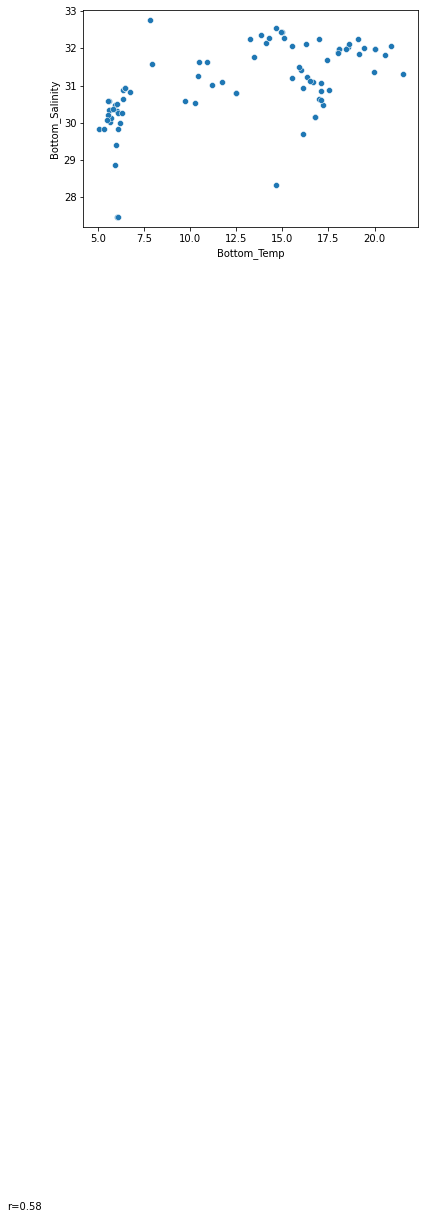

In [39]:
## identify correlation
import seaborn as sns
df_all = pd.read_csv('allseasons.csv')
# import the scipy library
import scipy as sp
# call the seaborn scatterplot function per usual
sns.scatterplot(data=df_all, x=df_all['Bottom_Temp'], y=df_all['Bottom_Salinity'], )

# call the scipy function for pearson correlation
r, p = sp.stats.pearsonr(x=df_all['Bottom_Temp'], y=df_all['Bottom_Salinity'])
# annotate the pearson correlation coefficient text to 2 decimal places
plt.text(.05, .8, 'r={:.2f}'.format(r))

plt.show()

## Surface Temp to Bottom Temp: 0.9
## Surface Temp to Surface Salt: 0.31
## Surface Temp to Temp Strat: 0.61
## Surface Salt to Bottom Salt: 0.57
## Surface Salt to Salt Strat: 0.87
## Bottom Temp to Bottom Salt: 0.58

# can try excluding bottom temp and salt stratification from model?

In [3]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## February Model

In [4]:
# feb_df

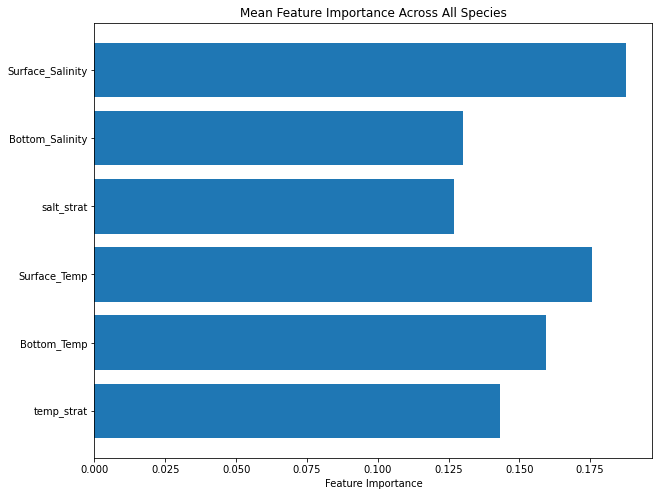

0.676923076923077


0    0.187616
1    0.130098
2    0.127084
3    0.175557
4    0.159408
5    0.143313
Name: mean_importance, dtype: float64

In [24]:
features = feb_df[['Surface_Salinity','Bottom_Salinity','salt_strat', 'Surface_Temp','Bottom_Temp','temp_strat']]
labels = feb_df.loc[:,'Atl_croaker_(nibea98)':'Atl_herring'].applymap(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42
                                                             ,min_samples_split=10,min_samples_leaf=1,max_depth=10,bootstrap=True
                                                             ))
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

feb_accuracies = []
for i, species in enumerate(labels.columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])    
    feb_accuracies.append(accuracy)
    # print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))

feb_average_accuracy = np.mean(feb_accuracies)

feature_importance_df = pd.DataFrame() # type: ignore
for i, species in enumerate(labels.columns):
    importances = rf_classifier.estimators_[i].feature_importances_
    feature_importance_df[species] = importances

# Calculate mean feature importance across all species
feature_importance_df['mean_importance'] = feature_importance_df.mean(axis=1)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features.columns, feature_importance_df['mean_importance'])
plt.xlabel('Feature Importance')
plt.title('Mean Feature Importance Across All Species')
plt.gca().invert_yaxis()
plt.show()

print(feb_average_accuracy)
feature_importance_df['mean_importance']

### Hyperparameter tuning

In [ ]:
param_dist = {
    'estimator__n_estimators' : [50,100,200,500],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__bootstrap': [True, False]
}

rf_classifier = MultiOutputClassifier(RandomForestClassifier())
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

randomized_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=20, cv=3, random_state=42)
randomized_search.fit(X_train, y_train)
best_params_rand = randomized_search.best_params_
best_model_rand = randomized_search.best_estimator_
y_pred_best_rand = best_model_rand.predict(X_test)
accuracy_best_rand = accuracy_score(y_test, y_pred_best_rand)

print(f"Best RF Accuracy: {accuracy_best_rand:.2f}")
print(f"Best Hyperparameters: {best_params_rand}")


Best RF Accuracy: 0.00
Best Hyperparameters: {'estimator__n_estimators': 100, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 10, 'estimator__bootstrap': True}


## June Model

In [7]:
june_df

,Unnamed: 0,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),...,White_perch,Longitude,Latitude,station,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat
0,0,0.099418,0.084657,0.044397,0.000000,0.051107,0.000000,0.012972,0.189331,0.038358,...,0.000000,-74.053017,39.931583,32.0,17.140702,12.457034,28.720984,30.790282,4.683667,2.069298
1,1,0.001721,0.115873,0.136426,0.012465,0.005384,0.044771,0.015194,0.007425,0.030683,...,0.000000,-73.969883,39.910650,33.0,16.641771,11.719691,28.821981,31.087595,4.922080,2.265614
2,2,0.000209,0.064979,0.069530,0.015312,0.001810,0.420162,0.005123,0.004204,0.013071,...,0.000292,-73.970100,39.786067,35.0,16.014177,10.484886,29.672538,31.638679,5.529290,1.966141
3,3,0.016349,0.023615,0.000000,0.025431,0.000000,0.124432,0.000000,0.000000,0.000000,...,0.000000,-74.031967,39.578533,36.0,16.190299,10.910505,30.539148,31.625504,5.279794,1.086356
4,4,0.000263,0.002590,0.000300,0.022219,0.154468,0.033553,0.046564,0.016683,0.000544,...,0.000000,-73.505483,39.232883,39.0,14.863023,7.798937,32.584777,32.771982,7.064086,0.187205
5,5,0.106499,0.033638,0.005077,0.027164,0.098629,0.014217,0.086062,0.013201,0.026276,...,0.000000,-74.557833,39.159450,40.0,17.011382,16.965723,30.619194,30.630975,0.045660,0.011781
6,6,0.093850,0.000000,0.005956,0.009306,0.171231,0.023056,0.158812,0.020812,0.113601,...,0.000000,-74.616483,39.214867,41.0,17.301592,17.212064,30.474655,30.489239,0.089528,0.014584
7,7,0.002029,0.380744,0.305001,0.000894,0.010044,0.002786,0.005091,0.000860,0.041174,...,0.000000,-74.664967,39.153933,43.0,17.178774,17.096159,30.598345,30.609895,0.082616,0.011550
8,8,0.029526,0.487037,0.069081,0.001200,0.026219,0.009709,0.015577,0.003894,0.083805,...,0.000000,-74.926400,38.902000,45.0,17.109680,17.099155,31.096051,31.072630,0.010525,0.023421
9,9,0.008572,0.040180,0.027567,0.000268,0.008583,0.008851,0.011018,0.035592,0.080139,...,0.000000,-74.974450,38.844600,46.0,17.639786,17.501168,30.610352,30.892363,0.138618,0.282012


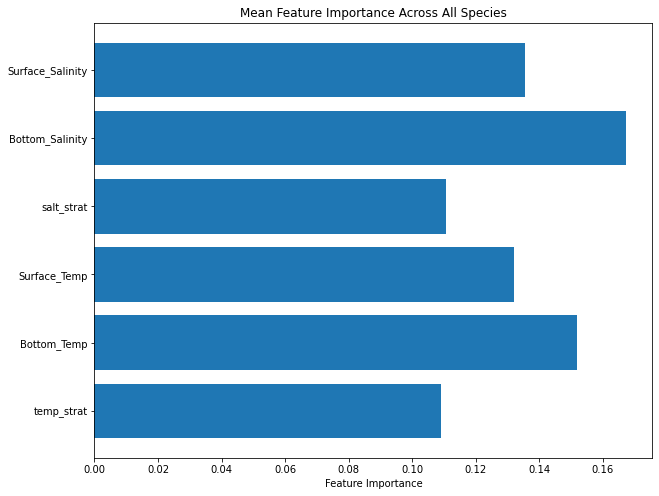

0.7634408602150541


,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),Str_sea_robin,...,Silver_perch(nibea93),Sturgeon,Fourspot_flounder,Atl_silverside,Gulf_stream_flounder,Rough_scad,Silver_hake,Winter_or_Yellowtail_flounder,White_perch,mean_importance
0,0.310164,0.052115,0.194022,0.294118,0.124205,0.0,0.124205,0.194022,0.124205,0.187213,...,0.187484,0.180492,0.126527,0.126550,0.189834,0.146746,0.173359,0.179607,0.111134,0.135457
1,0.180895,0.197959,0.220733,0.176471,0.341089,0.0,0.341089,0.220733,0.341089,0.201973,...,0.301955,0.280944,0.189204,0.162773,0.133861,0.146463,0.147979,0.068310,0.337735,0.167288
2,0.076954,0.050333,0.077481,0.102941,0.107321,0.0,0.107321,0.077481,0.107321,0.197847,...,0.054221,0.115213,0.121817,0.150092,0.186114,0.156697,0.171182,0.211406,0.167775,0.110565
3,0.142785,0.260000,0.209236,0.000000,0.114571,0.0,0.114571,0.209236,0.114571,0.225446,...,0.119504,0.136937,0.104588,0.291815,0.175056,0.164316,0.214652,0.082637,0.161906,0.132124
4,0.185070,0.374833,0.223415,0.264706,0.202760,0.0,0.202760,0.223415,0.202760,0.126988,...,0.214313,0.180335,0.210233,0.174284,0.148007,0.159894,0.144466,0.216148,0.115758,0.151802
5,0.104133,0.064759,0.075113,0.161765,0.110053,0.0,0.110053,0.075113,0.110053,0.060533,...,0.122522,0.106079,0.247631,0.094486,0.167128,0.225884,0.148361,0.241892,0.105692,0.109216


In [27]:
features = june_df[['Surface_Salinity','Bottom_Salinity','salt_strat', 'Surface_Temp','Bottom_Temp','temp_strat']]
labels = june_df.loc[:,'Atl_croaker_(nibea98)':'White_perch'].applymap(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42
                                                             , min_samples_split=5, min_samples_leaf=1, max_depth=20, bootstrap=True))
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracies = []
for i, species in enumerate(labels.columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])    
    accuracies.append(accuracy)
    # print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))

june_average_accuracy = np.mean(accuracies)

feature_importance_df = pd.DataFrame() # type: ignore
for i, species in enumerate(labels.columns):
    importances = rf_classifier.estimators_[i].feature_importances_
    feature_importance_df[species] = importances

feature_importance_df['mean_importance'] = feature_importance_df.mean(axis=1)
# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features.columns, feature_importance_df['mean_importance'])
plt.xlabel('Feature Importance')
plt.title('Mean Feature Importance Across All Species')
plt.gca().invert_yaxis()
plt.show()

print(june_average_accuracy)
feature_importance_df

### June hyperparameter tuning. (run blocks together)

In [26]:
param_dist = {
    'estimator__n_estimators' : [50,100,200,500],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__bootstrap': [True, False]
}

rf_classifier = MultiOutputClassifier(RandomForestClassifier())
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

randomized_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=20, cv=3, random_state=42)
randomized_search.fit(X_train, y_train)
best_params_rand = randomized_search.best_params_
best_model_rand = randomized_search.best_estimator_
y_pred_best_rand = best_model_rand.predict(X_test)
accuracy_best_rand = accuracy_score(y_test, y_pred_best_rand)

print(f"Best RF Accuracy: {accuracy_best_rand:.2f}")
print(f"Best Hyperparameters: {best_params_rand}")


Best RF Accuracy: 0.00
Best Hyperparameters: {'estimator__n_estimators': 100, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 20, 'estimator__bootstrap': True}


## August Model

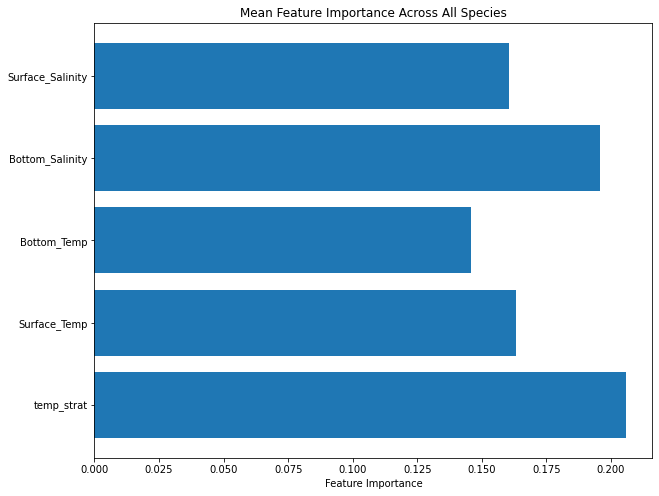

0.7849462365591399


,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),Str_sea_robin,...,Atl_menhaden_LS16_or_river_herrings,Atl_or_nor_sand_lance,Bluefish,Silver_anchovy,Seaboard_goby,Nor_puffer,Silver_perch(nibea93),Nor_sennet95,Str_cusk_eel,mean_importance
0,0.0,0.371429,0.0,0.0,0.081909,0.0,0.055562,0.286955,0.293266,0.233216,...,0.285987,0.188036,0.150600,0.203968,0.224761,0.203461,0.168080,0.282360,0.252159,0.160575
1,0.0,0.271429,0.0,0.0,0.291548,0.0,0.365158,0.132162,0.085169,0.197152,...,0.155966,0.239715,0.220096,0.127321,0.186406,0.252288,0.257346,0.171907,0.199685,0.195927
2,0.0,0.100000,0.0,0.0,0.242259,0.0,0.257875,0.110234,0.107089,0.131004,...,0.150811,0.165900,0.174096,0.180256,0.156768,0.168303,0.130679,0.114246,0.124514,0.145600
3,0.0,0.185714,0.0,0.0,0.071610,0.0,0.060083,0.210181,0.432299,0.189261,...,0.254687,0.265037,0.229379,0.231865,0.202490,0.195469,0.238133,0.203439,0.244830,0.163108
4,0.0,0.071429,0.0,0.0,0.312674,0.0,0.261321,0.260469,0.082177,0.249367,...,0.152549,0.141313,0.225830,0.256591,0.229575,0.180480,0.205762,0.228048,0.178812,0.205758


In [44]:
features = august_df[['Surface_Salinity','Bottom_Salinity','salt_strat', 'Surface_Temp','Bottom_Temp','temp_strat']]
labels = august_df.loc[:,'Atl_croaker_(nibea98)':'Str_cusk_eel'].applymap(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42
                                                             , min_samples_split=5, min_samples_leaf=2, max_depth=None, bootstrap=True))
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracies = []
for i, species in enumerate(labels.columns):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])    
    accuracies.append(accuracy)
    # print(f"Classification report for {species}:\n", classification_report(y_test.iloc[:, i], y_pred[:, i]))

aug_average_accuracy = np.mean(accuracies)

feature_importance_df = pd.DataFrame() # type: ignore
for i, species in enumerate(labels.columns):
    importances = rf_classifier.estimators_[i].feature_importances_
    feature_importance_df[species] = importances

feature_importance_df['mean_importance'] = feature_importance_df.mean(axis=1)
# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features.columns, feature_importance_df['mean_importance'])
plt.xlabel('Feature Importance')
plt.title('Mean Feature Importance Across All Species')
plt.gca().invert_yaxis()
plt.show()

print(aug_average_accuracy
feature_importance_df


In [30]:
param_dist = {
    # 'estimator__n_estimators' : [50,100,200,500],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__bootstrap': [True, False]
}

rf_classifier = MultiOutputClassifier(RandomForestClassifier())
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

randomized_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=20, cv=3, random_state=42)
randomized_search.fit(X_train, y_train)
best_params_rand = randomized_search.best_params_
best_model_rand = randomized_search.best_estimator_
y_pred_best_rand = best_model_rand.predict(X_test)
accuracy_best_rand = accuracy_score(y_test, y_pred_best_rand)

print(f"Best RF Accuracy: {accuracy_best_rand:.2f}")
print(f"Best Hyperparameters: {best_params_rand}")


Best RF Accuracy: 0.00
Best Hyperparameters: {'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': None, 'estimator__bootstrap': True}
